# Lower Bound

In [63]:
import pandas as pd
import numpy as np
from PIL import Image
from collections import Counter

In [41]:
# Load clip baseline
baseline = pd.read_pickle('../clip-training/baseline-clip-text-and-text.pkl').rename(columns={'txt': 'txt_label'})

In [42]:
df1 = baseline.drop_duplicates(subset=['tweet_id'], keep='first')

In [43]:
df1

tweet_id  work_time  \
0     1437188092683751424  23.626190   
1     1435346675674013696  23.626190   
2     1437130100718383104  23.626190   
3     1435211167924957184  21.878664   
4     1437123148386816000  25.275040   
...                   ...        ...   
1895  1435115263880536064  10.388083   
1896  1435903139081773056  14.875105   
1897  1437128396555931648  14.875105   
1898  1436779038203432960  12.241613   
1899  1436071900803915776  20.498567   

                                              orig_path  \
0     social-data/media_12/pt/1437188092683751429/im...   
1     social-data/media_07/pt/1435346675674013701/im...   
2     social-data/media_12/pt/1437130100718383105/im...   
3     social-data/media_07/en/1435211167924957190/im...   
4     social-data/media_12/pt/1437123148386816003/im...   
...                                                 ...   
1895  social-data/media_07/pt/1435115263880536064/im...   
1896  social-data/media_8_11/pt/1435903139081773057/...   
1897  social-data/media_12/pt/1437128396555931652/im...   
1898  social-data/media_12/pt/1436779038203432971/im...   
1899  social-data/media_8_11/pt/1436071900803915776/...   

                                                   text  \
0     Simone ja esta gravando um novo clipe para “En...   
1     EVANGELINE LILLY EU TE AMO EU TE AMOOOO  https...   
2     Aqui de boa na rede, enquanto o MBL passa verg...   
3     @Khayizasoze I was sent this picture,sengiyasa...   
4     @felipe_autran Todos juntos. A manifestação é ...   
...                                                 ...   
1895  spoiler jujutsu , , , , , , , , , , , CHOSO FO...   
1896  Bom dia só pra quem sabe que o D12 é contra Lu...   
1897  PRA REVER LOKI EU VOU TER QUE VER &gt;AQUILO&l...   
1898  Estão abertas as apostas! Quanto tempo demora ...   
1899  Pois, é! Máscaras caindo… #BolsonaroArregou e ...   

                                    img_path img_label txt_label  \
0     annotated-data/1437188092683751429.jpg     False     False   
1     annotated-data/1435346675674013701.jpg     False     False   
2     annotated-data/1437130100718383105.jpg     False      True   
3     annotated-data/1435211167924957190.jpg     False     False   
4     annotated-data/1437123148386816003.jpg      True      True   
...                                      ...       ...       ...   
1895  annotated-data/1435115263880536064.png     False     False   
1896  annotated-data/1435903139081773057.jpg     False      True   
1897  annotated-data/1437128396555931652.jpg     False     False   
1898  annotated-data/1436779038203432971.jpg     False     False   
1899  annotated-data/1436071900803915776.jpg     False     False   

                                        processed_tweet  \
0     Simone ja esta gravando um novo clipe para “ E...   
1                 EVANGELINE LILLY EU TE AMO EU TE AMOO   
2     Aqui de boa na rede enquanto o MBL passa vergo...   
3                   I was sent this picture,sengiyasaba   
4     Todos juntos A manifestação é assinada por ele...   
...                                                 ...   
1895  spoiler jujutsu            CHOSO FOFIS CHAMAND...   
1896  Bom dia só pra quem sabe que o D12 é contra Lu...   
1897  PRA REVER LOKI EU VOU TER QUE VER &gt;AQUILO&l...   
1898  Estão abertas as apostas Quanto tempo demora p...   
1899  Pois é Máscaras caindo… Bolsonaro Arregou e as...   

                                       tweet_embeddings  \
0     [0.09088134765625, -0.01934814453125, -0.20239...   
1     [-0.37548828125, 0.047698974609375, -0.0920410...   
2     [-0.0270538330078125, 0.36669921875, -0.118713...   
3     [0.00832366943359375, 0.057464599609375, 0.152...   
4     [0.0011138916015625, 0.1202392578125, -0.04299...   
...                                                 ...   
1895  [-0.34228515625, 0.253662109375, 0.02928161621...   
1896  [0.032958984375, 0.3369140625, -0.23388671875,...   
1897  [-0.26806640625, 0.5009765625, 0.1845703125, 0...   
18

# Finding the clusters using Text Embeddings

In [44]:
from sentence_transformers import SentenceTransformer, util
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

### Leiden Clustering

In [45]:
cos_mat_txt = util.cos_sim(df1['clip_embeddings'].tolist(),df1['clip_embeddings'].tolist())

In [46]:
cos_copy = cos_mat_txt.detach().cpu().numpy()
cos_copy = np.absolute(cos_copy)

In [47]:
import networkx as nx
import leidenalg as la
import igraph as ig

In [48]:
cos_copy[cos_copy < 0.7] = 0

In [49]:
G = nx.from_numpy_array(cos_copy)
g = ig.Graph.from_networkx(G)
communities = la.find_partition(g, la.ModularityVertexPartition, n_iterations=-1)
optimizer = la.Optimiser()        
diff = 1
while diff > 0:
    diff = optimizer.optimise_partition(communities,n_iterations=-1)

# Quantitative analysis

In [76]:
labels = df1.iloc[communities[cluster_id][]]['img_label']

False

In [84]:
stats = Counter(r_labels)

In [105]:

    print(label, counts)

False 13
True 2


In [108]:
15 *0.75

11.25

In [134]:
Counter(r_labels)

Counter({False: 15})

In [111]:
for cluster_id in range(len(communities)):
    cluster_label = 'notSure'
    if len(communities[cluster_id]) > 15:
        r_labels = []
        # Get most 15 representatives from the cluster
        representatives = sorted(range(len(communities[cluster_id])), key=lambda x: len(set(communities[cluster_id]).intersection(communities.graph.neighborhood(communities[cluster_id][x]))), reverse=True)[:15]
        for r in representatives:
            oracle_label = df1.iloc[communities[cluster_id][r]]['img_label'] or  df1.iloc[communities[cluster_id][r]]['txt_label']
            r_labels.append(oracle_label)
        
       
        for label, counts in  Counter(r_labels).items():
            if counts  > 15 *0.75:
                cluster_label = label
                
    for sample_index in communities[cluster_id]:
        df1.loc[sample_index,'cluster_label'] = cluster_label

Text(0.5, 1.0, 'Labels Distribution')

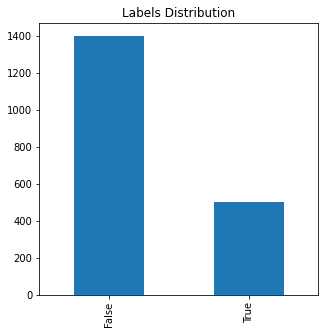

In [122]:
plt.figure(figsize=(5,5))
for index, row in df1.iterrows():
    df1.loc[index,'tweet_label'] = row['img_label'] or row['txt_label']
df1['tweet_label'].value_counts().plot(kind='bar'); plt.title('Labels Distribution')

Text(0.5, 1.0, 'Incorrect Labeled')

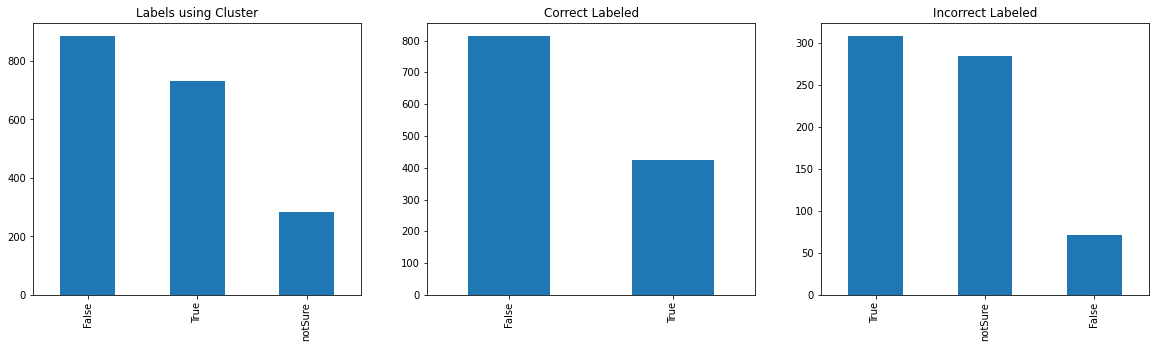

In [194]:
# Check the number of samples correctly matched
plt.figure(figsize=(20,5))
plt.subplot(1,3,1); df1['cluster_label'].value_counts().plot(kind='bar'); plt.title('Labels using Cluster')
plt.subplot(1,3,2); df1[ df1['cluster_label'] == ( df1['img_label'] | df1['txt_label'] ) ]['cluster_label'].value_counts().plot(kind='bar'); plt.title('Correct Labeled')
plt.subplot(1,3,3); df1[ df1['cluster_label'] != ( df1['img_label'] | df1['txt_label'] ) ]['cluster_label'].value_counts().plot(kind='bar'); plt.title('Incorrect Labeled')


In [135]:
from sklearn.metrics import balanced_accuracy_score

In [141]:
y_pred = df1['cluster_label'].values
y_true = df1['tweet_label'].values
# weights = 

In [188]:
# Ref https://statisticaloddsandends.wordpress.com/2020/01/23/what-is-balanced-accuracy/
relevant_pred = df1[df1['cluster_label'] == True]
irrelevant_pred =  df1[df1['cluster_label'] == False]

relevant_true = df1[df1['tweet_label'] == True]
irrelevant_true = df1[df1['tweet_label'] == False]

# Precision
TP = pd.merge(relevant_pred, relevant_true,how='inner', on=['tweet_id'])
TN =  pd.merge(irrelevant_pred, irrelevant_true,how='inner', on=['tweet_id'])
FP =  pd.merge(relevant_pred, irrelevant_true,how='inner', on=['tweet_id'])
FN =  pd.merge(irrelevant_pred, relevant_true,how='inner', on=['tweet_id'])

sensivity = len(TP) /  (len(TP)  + len(FN))
specifity = len(TN) /  (len(TN)  + len(FP))

ballanced_acc = (sensivity + specifity) / 2

In [189]:
ballanced_acc

0.790882749861078

In [132]:
correct_labeled = len(df1[df1['cluster_label'] == df1['tweet_label']])
incorrect_labeled = len(df1[(df1['cluster_label'] != df1['tweet_label']) & (df1['cluster_label'] != 'notSure') ])
not_sure = len(df1[df1['cluster_label'] == 'notSure' ])
print("Correct", correct_labeled, correct_labeled/len(df1))
print("Incorrect", incorrect_labeled, incorrect_labeled/len(df1))
print("Not sure", not_sure, not_sure/len(df1))

Correct 1237 0.6510526315789473
Incorrect 379 0.1994736842105263
Not sure 284 0.14947368421052631


In [237]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import pandas as pd
import io

def img2string(img_path, is_query=False):
    img = Image.open(img_path)
    # Resize
    basewidth = 224
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    
    img_buffer = io.BytesIO()
    img.save(img_buffer, format="PNG")
    imgStr = base64.b64encode(img_buffer.getvalue())
    return '<img src="data:image/png;base64,{0:s}">'.format(imgStr.decode())


def display_samples(df, n_samples=10):
    data = pd.DataFrame()
    index=0
    for _, s in df.sample(n_samples).iterrows():
        img = img2string('../annotations/'+s['img_path'])
        
        
        label = 'notSure'
        if s['cluster_label'] == True:
            label = 'Relevant'
        if s['cluster_label'] == False:
            label = 'Irrelevant'
        data.loc[f"S-{index}", 'Pred'] = label
        data.loc[f"S-{index}", 'GT'] = 'Relevant' if s['tweet_label'] else 'Irrelevant'
        data.loc[f"S-{index}", 'Img'] = img
        data.loc[f"S-{index}", 'Text'] = s['text']
        index +=1

    data = data.T
    display(HTML('<h1>Samples</h1>'))
    html_all = data.to_html(escape=False)
    display(HTML(html_all))

/tmp/ipykernel_286281/1205369579.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML



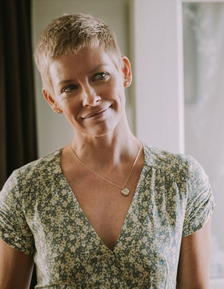
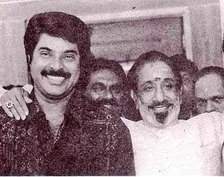
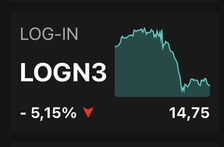
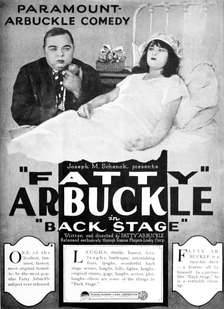
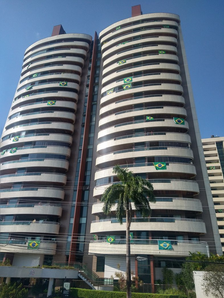
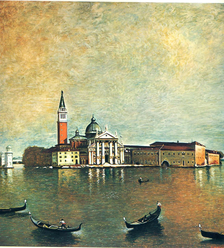
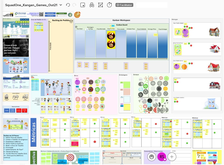
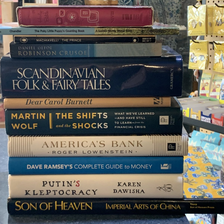
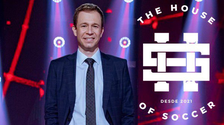
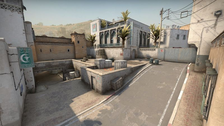

In [238]:
# Plot NotSure, TP, TN, and FP, FN
notsures = df1[df1['cluster_label'] == 'notSure']
display_samples(notsures, n_samples=10)


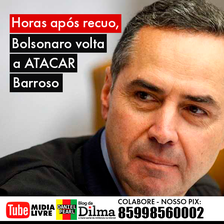
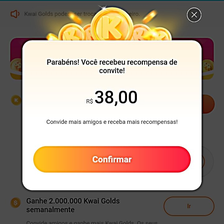
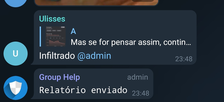
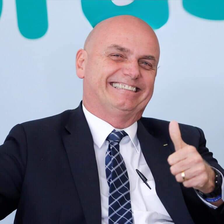
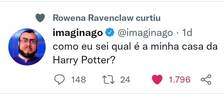
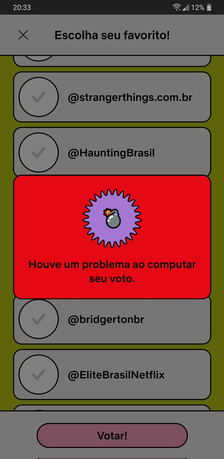
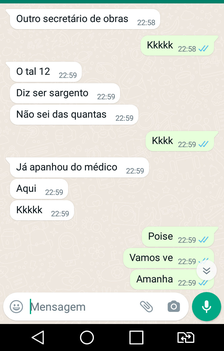
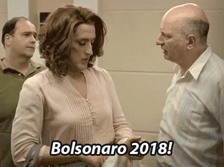
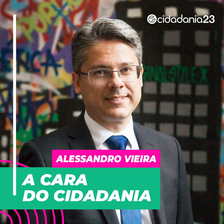
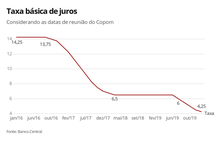

In [240]:
fp = df1[(df1['cluster_label'] ==True) & (df1['tweet_label'] == False)]
display_samples(fp, n_samples=10)


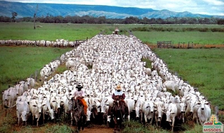
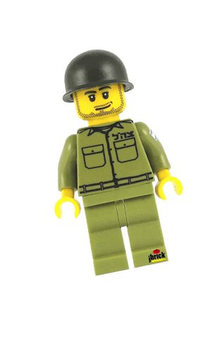
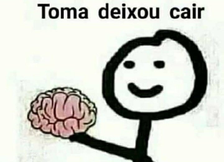
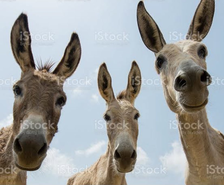
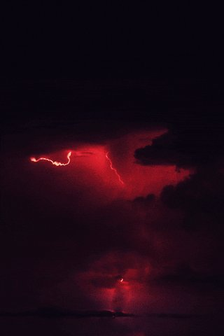
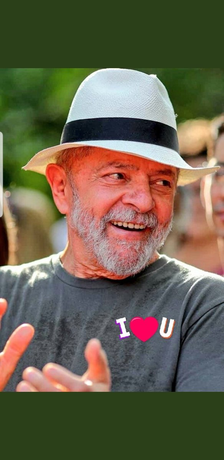
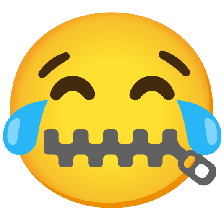
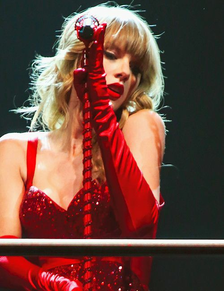
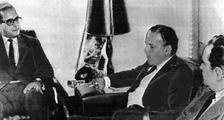
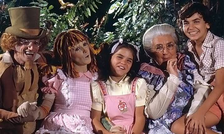

In [241]:
fp = df1[(df1['tweet_label'] ==True) & (df1['cluster_label'] == False)]
display_samples(fp, n_samples=10)


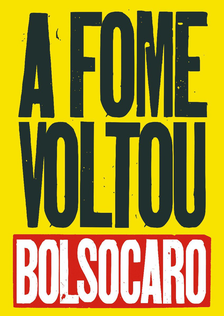
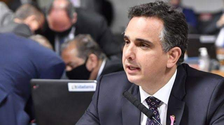
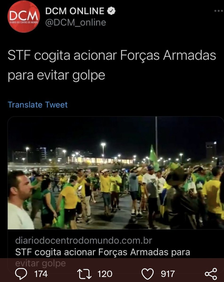
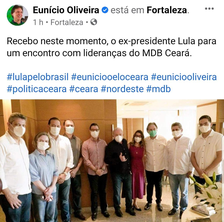
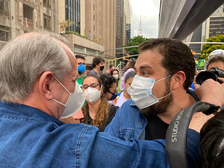
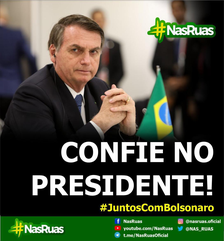
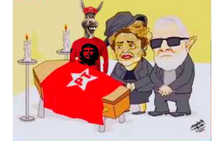
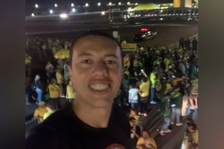
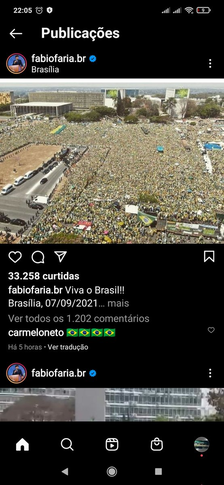
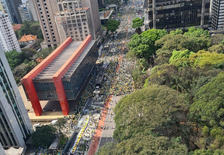

In [242]:
tp = df1[(df1['tweet_label'] ==True) & (df1['cluster_label'] == True)]
display_samples(tp, n_samples=10)


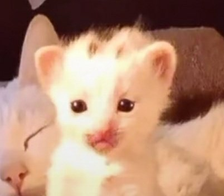
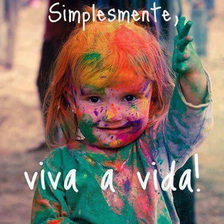
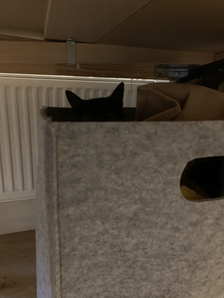
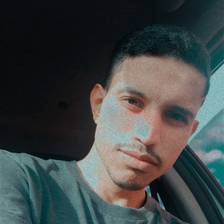
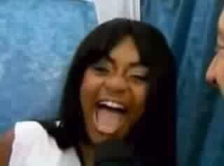
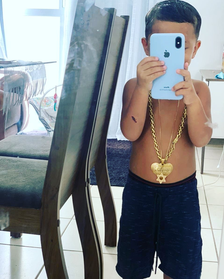
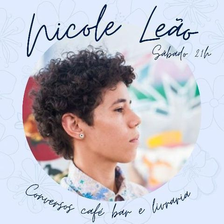
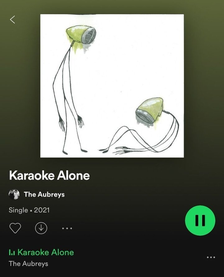
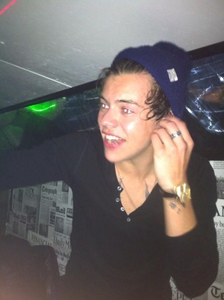
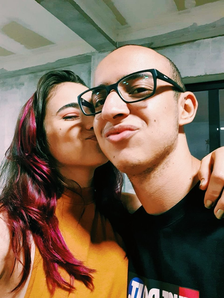

In [244]:
tn = df1[(df1['tweet_label'] ==False) & (df1['cluster_label'] == False)]
display_samples(tn, n_samples=10)

# Qualitative analysis

In [ ]:
dict_stats = {}
k = 0
for i in range(len(communities)):
    if not dict_stats.get(len(communities[i])):
        dict_stats[len(communities[i])] =0
    dict_stats[len(communities[i])] +=1

In [51]:
dict_stats

{863: 1,
 731: 1,
 34: 1,
 22: 1,
 11: 1,
 10: 1,
 7: 1,
 5: 1,
 4: 1,
 3: 1,
 2: 14,
 1: 182}

In [57]:
dict_stats = pd.DataFrame()
k = 0
for i in range(len(communities)):
    if len(communities[i]) == 731 :
        for j in range(731):
            dict_stats=  dict_stats.append(df1.iloc[communities[i][j]])

/tmp/ipykernel_286281/2883923562.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dict_stats=  dict_stats.append(df1.iloc[communities[i][j]])
/tmp/ipykernel_286281/2883923562.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dict_stats=  dict_stats.append(df1.iloc[communities[i][j]])
/tmp/ipykernel_286281/2883923562.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dict_stats=  dict_stats.append(df1.iloc[communities[i][j]])
/tmp/ipykernel_286281/2883923562.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dict_stats=  dict_stats.append(df1.iloc[communities[i][j]])
/tmp/ipykernel_286281/2883923562.py:6: FutureWarning: The frame.

1254|  666|  quase não acordo de novo nessa porra  https://t.co/ymGXtzDXNK|  False

1620|  657|  Como as MINIfestações do @MBLivre flopou, em todo o Brasil, vamos tentar lacrar, com informações de um outro Continente...😏🤫🤭  https://t.co/J8d3ZWQoOa|  False

326|  642|  a minha reação após ver o novo visu do @fxzwxy  https://t.co/qiGkzE6naC|  False

811|  612|  @gabygotthepower Não gabyy vc não quer fazer isso com sua vida, você é melhor que isso  https://t.co/vblxSVc2Uk|  False

861|  611|  @anonymousBROF vá em frente, mas não prometo nada  https://t.co/dXwDBXvn86|  False

1779|  611|  VISÃO, MEUDEUS VISÃO. ELE TA SE DESFAZENDO. EU NÃO VOU SOFRER ISSO DE NOVO, DE NOVO NÃO  https://t.co/Ii38XEpF46|  False

967|  609|  EH Q ELE TÁ TÃO LINDINHO  https://t.co/iobq95hWMf|  False

1473|  609|  Sinto raiva de mim mesmo por não conseguir fazer nada, mas não faço nada pra mudar isso, como acabar com esse ciclo? Será que eu tenho que nascer de novo?  https://t.co/QMsMUAQx91|  False

1310|  604|  

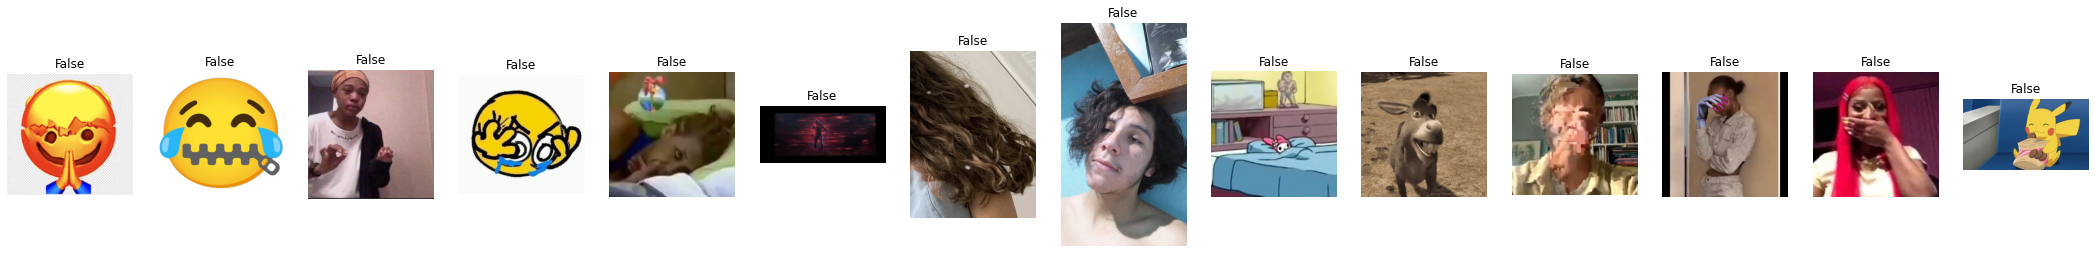

In [66]:
index = 1
cluster_id = 0
plt.figure(figsize=(40,10))
for i in sorted(range(len(communities[cluster_id])), key=lambda x: len(set(communities[cluster_id]).intersection(communities.graph.neighborhood(communities[cluster_id][x]))), reverse=True):
    degree = len(set(communities[cluster_id]).intersection(communities.graph.neighborhood(communities[cluster_id][i])))
    print(communities[cluster_id][i], degree, df1.iloc[communities[0][i]]['text'], df1.iloc[communities[cluster_id][i]]['img_label'],  sep='|  ')
    print()
    plt.subplot(1, 15,index); plt.imshow(Image.open("../annotations/"+df1.iloc[communities[cluster_id][i]]['img_path'])); plt.title(df1.iloc[communities[cluster_id][i]]['img_label']), plt.axis('off')
    index+=1
    if index>=15:
        break

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='img_label,txt_label'>

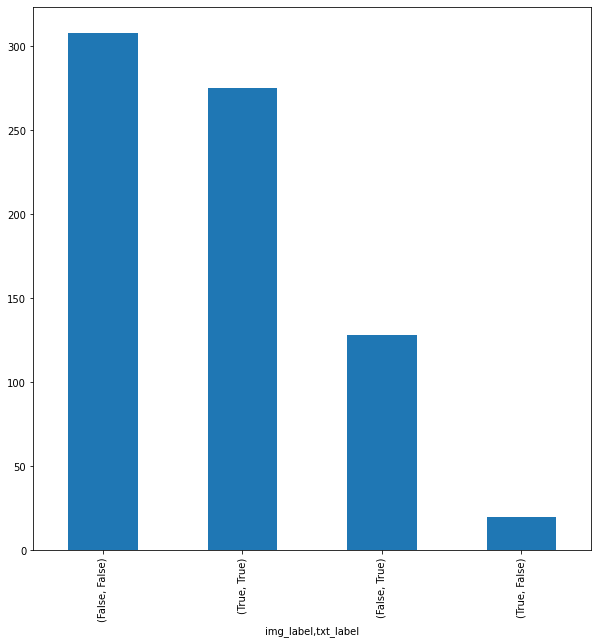

In [59]:
%pylab inline
plt.figure(figsize=(10,10))
dict_stats[['img_label','txt_label']].value_counts().plot(kind='bar')